In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
## First let's import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math
from scipy.stats import norm, skew
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Get the train and test data
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')

In [4]:
# Check the columns and rows of 
train.shape , test.shape 

((1460, 81), (1459, 80))

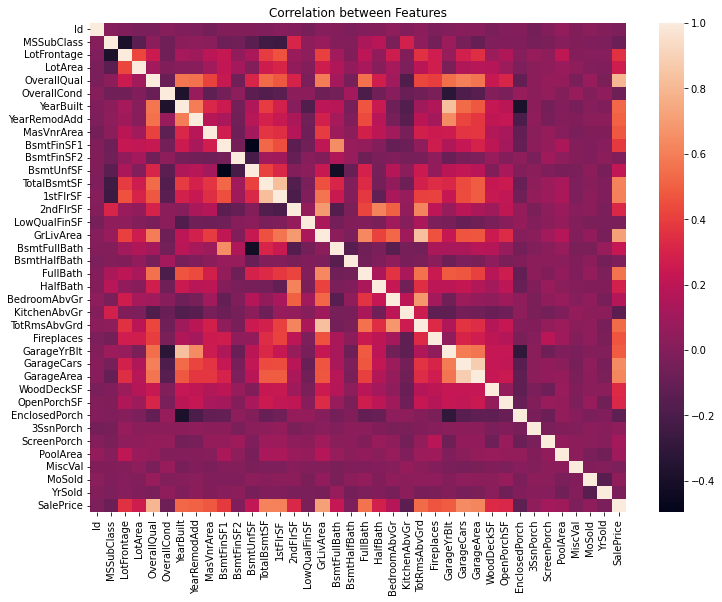

In [5]:
# Heat map visualization
corrmat=train.corr()
f, ax= plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)
plt.title("Correlation between Features");

We can create a heatmap to visualize the correlation of features. The bottom row for SalePrice shows high corellation with OverallQual, GrLivingArea, 1stFlrSf, 2ndFlrSF, TotRmAbvGrd, GarageCars, and GarageArea.

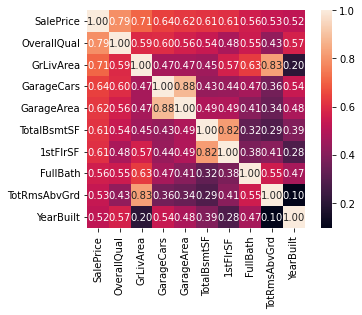

In [6]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can zoom in even further to see the variables with the highest correlation to SalePrice. We can also see that GarageCars and GarageArea are pretty similar with a correlation of 0.88 as well as TotalBsmtSF and 1stFlr with a correlation of 0.82.

In [7]:
# Correlation between SalePrice and Feature columns
SalePrice_corr = train.corr()['SalePrice'].sort_values(ascending=[False])[1:]
print(f'Correlation of SalePrice with Features: \n\n{SalePrice_corr}')

Correlation of SalePrice with Features: 

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135

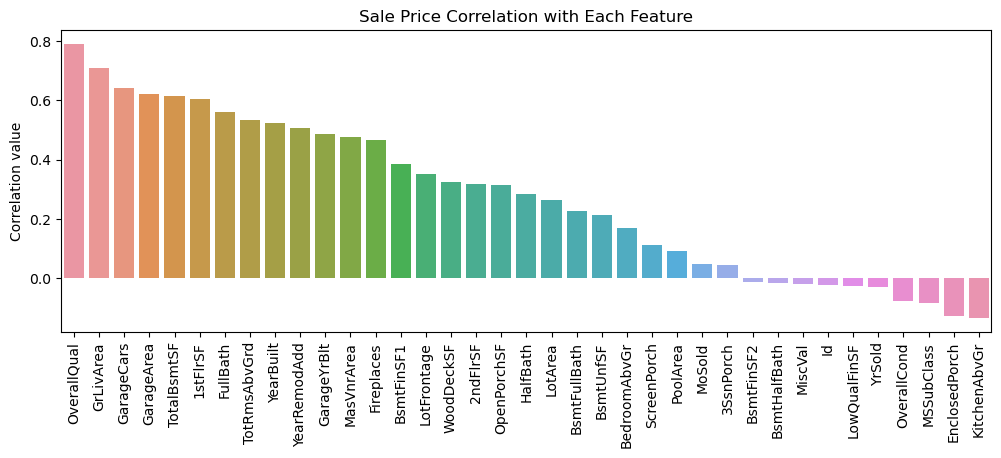

In [8]:
# Plot Correlation of Sale Price with other Feature Columns
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
ax = sns.barplot(x=SalePrice_corr.index, y=SalePrice_corr.values)
plt.title("Sale Price Correlation with Each Feature")
plt.ylabel("Correlation value")
plt.xticks(rotation=90);

From the above barplot, for the SalePrice label, the features such as OverallQual, GrLivArea, GarageCars, and GarageArea are highly correlated. These variables are highly important in deciding the sale price of a house.

## Finding Outliers


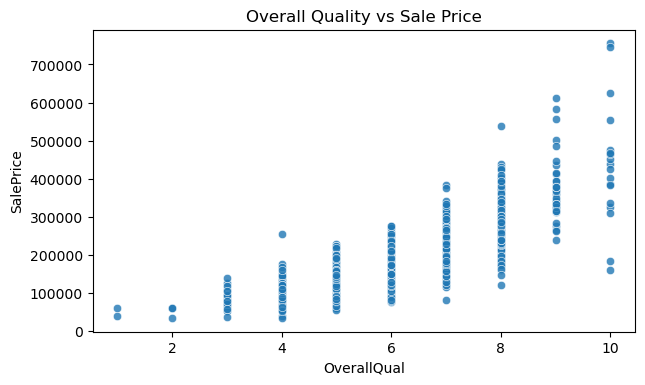

In [9]:
# Plot Overall Quality vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=train, y='SalePrice', x='OverallQual', alpha=0.8)
plt.title("Overall Quality vs Sale Price");

From the above scatter plot, it can be seen that, as the overall quality increases, the sale price of the house also increases. However, from the above plot, it looks like some houses have overall quality above 8 but have lower sale price.

In [10]:
# Finding the outliers
train[(train['OverallQual'] > 8) & (train['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Next to OverallQual column, the GrLivArea column is highly correlated with SalePrice and the relationship is plotted below.

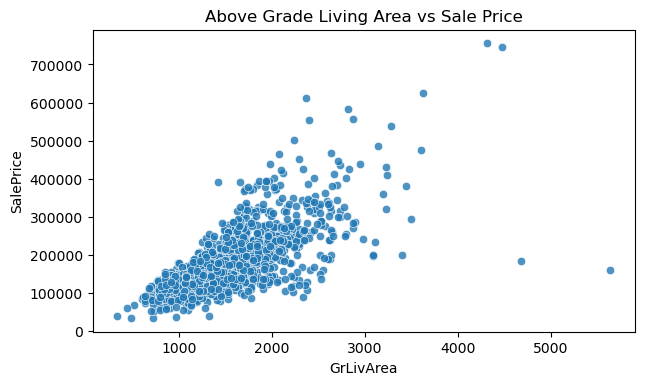

In [11]:
# Plot Above Grade Living Area vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=train, y='SalePrice', x='GrLivArea', alpha=0.8)
plt.title("Above Grade Living Area vs Sale Price");

The relationship between the Above Grade Living Area and the Sale Price is linear but there are some outliers. The sale price goes up with an increase in living area and an increase in overall quality.

However, few houses are available at a price less than $300000 for Ground Living Area of above 4000 sq. feet.

In [12]:
train[((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


The index 523 and index 1298 of the train data set are the common outliers based on above visualizations. These can be removed as they lie far from the rest of the observations.

In [13]:
# Removing those houses data as they might distort predictions
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]

print("The new shape of the dataframe is : ", train.shape)

The new shape of the dataframe is :  (1458, 81)


## More Visualization

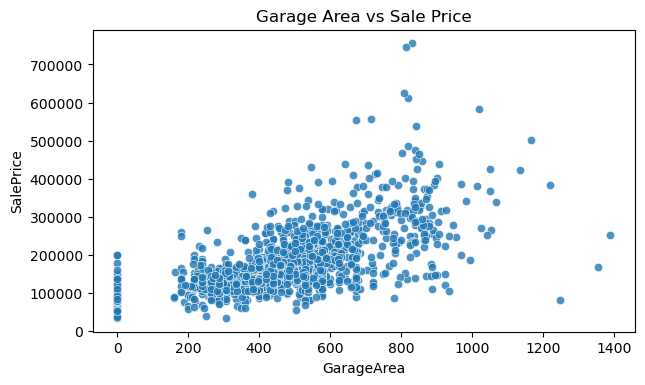

In [14]:
# Plot Garage Area vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=train, y='SalePrice', x='GarageArea', alpha=0.8)
plt.title("Garage Area vs Sale Price");

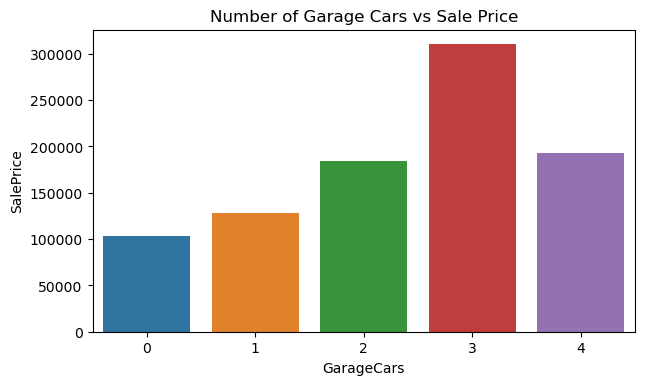

In [15]:
# Plot Garage Cars vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.barplot(data=train, y='SalePrice', x='GarageCars', ci=0)
plt.title("Number of Garage Cars vs Sale Price")
plt.xlim(-0.5, 4.5);

We can show missing data and percent for each value to decide which need to be filled

## Finding Skew

In [16]:
train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

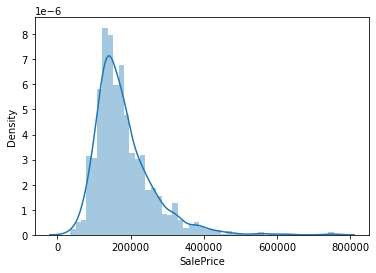

In [17]:
 sns.distplot(train['SalePrice'])

In [18]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


We have a positive skew and we must fix it

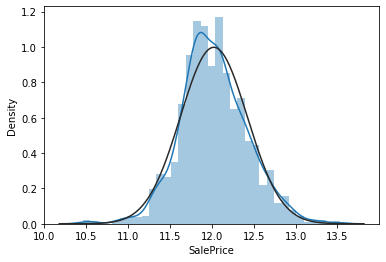

In [19]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm);

## Missing Data

We can merge the tests and training sets to delete columns and fill in null values at the same time before splitting them again later

In [20]:
y_train=train['SalePrice']
test_id=test["Id"]
data=pd.concat([train,test], axis=0,sort=False)
data=data.drop(['Id','SalePrice'],axis=1)

In [21]:
# Dealing with Missing Data
# Display the number of null values for each feature
#df.isnull().sum().sort_values()
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508
GarageQual,159,0.054508
GarageCond,159,0.054508


In [22]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 5]).index,1)
data.isnull().sum().max() #just checking that there's no missing data missing...


4

Since the missing values over PoolQC, MiscFeature, Alley all have more than 15% data missing, we can remove them. Most the rest of the variables are also deemed as not highly correlated and can be removed without worrying. 

In [23]:
total=data.isnull().sum().sort_values(ascending=False)
total.head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
Exterior1st     1
TotalBsmtSF     1
Electrical      1
SaleType        1
KitchenQual     1
HalfBath        0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

We removed all features with more than 5 missing features and set the rest to 0 values. 

In [24]:
# filling the numeric data
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    data[feature] = data[feature].fillna(0)

In [25]:
#filling categorical data
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [26]:
#Fill in the remaining missing values with the values that are most common for this feature.

data['Functional'] = data['Functional'].fillna('Typ')
data.drop(['Utilities'], axis=1, inplace=True)
data.isnull().sum().max() #just checking that there's no missing data missing...

0

## Feature Engineering

In [27]:
numeric_feats = data.dtypes[data.dtypes != 'object'].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
OpenPorchSF       2.529358
WoodDeckSF        1.844792
MSSubClass        1.375131
1stFlrSF          1.257286
GrLivArea         1.068750
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
YearBuilt        -0.599194
dtype: float64

In [28]:
for feature in high_skew.index:
    data[feature] = np.log1p(data[feature])

Above we check for and fix he skewness of other features. We can also create a new feature that is the total square feet that is a usfeul metric for determining sale price. 

In [29]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [30]:
#converting all categorical values to numerican
data=pd.get_dummies(data)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


Finally we can split the data back into train and test and check that the columsn match

In [31]:
X_train=data[:len(y_train)]
X_test=data[len(y_train):]
X_test.shape, X_train.shape

((1459, 218), (1458, 218))

We will be using Xgboost regressor to predict the values of the test set.

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [34]:
import xgboost as XGB

the_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
the_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4603,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0468, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1.7817, missing=nan,
             monotone_constraints='()', n_estimators=2200, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, predictor='auto', ...)

In [35]:
y_predict = np.floor(np.expm1(the_model.predict(X_test)))
y_predict

array([124074., 162069., 184513., ..., 171429., 123911., 224804.],
      dtype=float32)

We have sucessfully predicted the SalePrice of the test set of houses using the xgboost regressor and outputted it to a csv file.

In [36]:
sub = pd.DataFrame()
test=  pd.read_csv ('test.csv')
sub['Id'] = test['Id']
sub['SalePrice'] = y_predict
sub.to_csv('mysubmission.csv',index=False)